In [46]:
import pandas as pd
import re
import matplotlib.pyplot as plt

## Просмотр и подготовка данных

In [30]:
df = pd.read_excel("data.xlsx")
df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


Удалим пустой столбец

In [31]:
df = df.drop(columns=['Unnamed: 5'])
df

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00


В наборе есть строки с обозначением месяца и года, к которым относятся строки ниже. Для удобства создадим отдельный столбец, где будут указаны эти периоды для соответствующих строк.

In [32]:
period_pattern = re.compile(r'\bЯнварь|Февраль|Март|Апрель|Май|Июнь|Июль|Август|Сентябрь|Октябрь|Ноябрь|Декабрь\s+\d{4}\b')

for index, row in df.iterrows():
    if re.search(period_pattern, str(row['status'])):
        current_period = row['status']
    df.at[index, 'period'] = current_period

df

,client_id,sum,status,sale,new/current,document,receiving_date,period
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,Май 2021
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,Май 2021
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00,Октябрь 2021
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN,Октябрь 2021
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN,Октябрь 2021
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00,Октябрь 2021


И удалим теперь лишние строки

In [33]:
df = df[~df['status'].apply(lambda x: bool(re.search(period_pattern, str(x))))]
df

,client_id,sum,status,sale,new/current,document,receiving_date,period
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,Май 2021
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00,Октябрь 2021
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN,Октябрь 2021
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN,Октябрь 2021
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00,Октябрь 2021


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 1 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          724 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   document        709 non-null    object 
 6   receiving_date  607 non-null    object 
 7   period          724 non-null    object 
dtypes: float64(2), object(6)
memory usage: 50.9+ KB


Далеко не все типы колонок были верно определены.

In [35]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 1 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    Int64  
 1   sum             724 non-null    Float64
 2   status          724 non-null    string 
 3   sale            724 non-null    string 
 4   new/current     724 non-null    string 
 5   document        709 non-null    string 
 6   receiving_date  607 non-null    object 
 7   period          724 non-null    string 
dtypes: Float64(1), Int64(1), object(1), string(5)
memory usage: 52.3+ KB


Приведём ```receiving_date``` к типу Дата, а ```document``` преобразуем в boolean, приняв значение 'оригинал' за истину, а 'НЕТ' за ложь.

In [37]:
df['receiving_date'] = pd.to_datetime(df['receiving_date'], errors='coerce')
df['document'] = df['document'].apply(lambda x: None if pd.isna(x) else True if x == 'оригинал' else False if x == 'НЕТ' else x)
df = df.replace('-', None)

df

,client_id,sum,status,sale,new/current,document,receiving_date,period
1,6,11693.7,ВНУТРЕННИЙ,<NA>,<NA>,None,NaT,Май 2021
2,14,5452.7,ОПЛАЧЕНО,Петрова,новая,True,2021-07-26,Май 2021
3,15,13991.7,ОПЛАЧЕНО,Иванов,текущая,True,2021-06-08,Май 2021
4,16,719.7,ОПЛАЧЕНО,Иванов,текущая,True,2021-06-08,Май 2021
5,18,4253.7,ОПЛАЧЕНО,Иванов,текущая,True,2021-07-07,Май 2021
...,...,...,...,...,...,...,...,...
725,285,4328.7,ОПЛАЧЕНО,Васильев,текущая,True,2021-11-15,Октябрь 2021
726,360,3096.2,ОПЛАЧЕНО,Васильев,новая,False,NaT,Октябрь 2021
727,360,3096.2,ПРОСРОЧЕНО,Васильев,новая,False,NaT,Октябрь 2021
728,373,4403.7,ОПЛАЧЕНО,Михайлов,новая,True,2021-11-08,Октябрь 2021


In [38]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 1 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   client_id       724 non-null    Int64         
 1   sum             724 non-null    Float64       
 2   status          724 non-null    string        
 3   sale            723 non-null    string        
 4   new/current     723 non-null    string        
 5   document        708 non-null    boolean       
 6   receiving_date  606 non-null    datetime64[ns]
 7   period          724 non-null    string        
dtypes: Float64(1), Int64(1), boolean(1), datetime64[ns](1), string(4)
memory usage: 48.1 KB


Теперь все типы столбцов распознаются верно

## Вопросы

In [73]:
total_revenue = df[(df['period'] == 'Июль 2021') & (df['status'] != 'Просрочено')]['sum'].sum()

print(f"Общая выручка за июль 2021 по непросроченным сделкам: {round(total_revenue, 2)}")

Общая выручка за июль 2021 по непросроченным сделкам: 861874.17


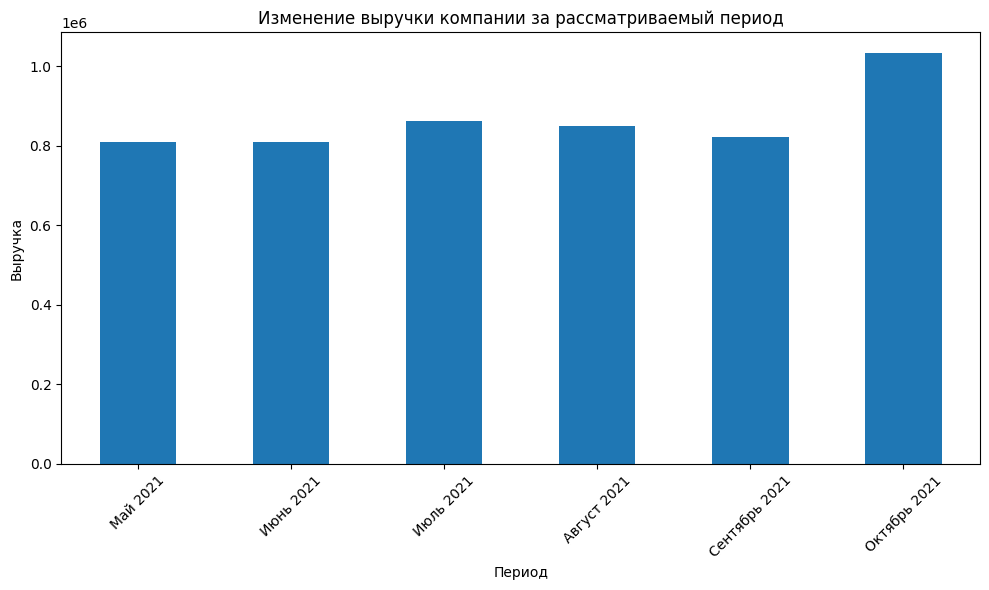

In [55]:
revenue_per_period = df.groupby('period')['sum'].sum()

ordered_index = ['Май 2021', 'Июнь 2021', 'Июль 2021', 'Август 2021', 'Сентябрь 2021', 'Октябрь 2021']
revenue_per_period = revenue_per_period.reindex(ordered_index)

plt.figure(figsize=(10, 6))
revenue_per_period.plot(kind='bar')
plt.title('Изменение выручки компании')
plt.xlabel('Период')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Здесь для построения графика потребовалось дополнительно создать список с хронологичесим порядком периодов и затем поменять порядок в соответствие с ним, так как по умолчанию месяцы были в алфавитном порядке.

In [59]:
top_manager = df[df['period'] == 'Сентябрь 2021'].groupby('sale')['sum'].sum().idxmax()

print(f"Менеджер, привлекший наибольшую сумму в сентябре 2021: {top_manager}")

Менеджер, привлекший наибольшую сумму в сентябре 2021: Смирнов


In [61]:
predominant_deal_type = df[df['period'] == 'Октябрь 2021']['new/current'].value_counts().idxmax()

print(f"Преобладающий тип сделок в октябре 2021: {predominant_deal_type}")

Преобладающий тип сделок в октябре 2021: текущая


In [64]:
may2021_deals = df[df['period'] == 'Май 2021']

count_june_receipts = len(may2021_deals[(may2021_deals['document']) & 
                                    (may2021_deals['receiving_date'].dt.month == 6) &
                                    (may2021_deals['receiving_date'].dt.year == 2021)])

print(f"Количество оригиналов договора по майским сделкам, полученных в июне 2021: {count_june_receipts}")

Количество оригиналов договора по майским сделкам, полученных в июне 2021: 76


## Задание

In [74]:
month_mapping = {
    'Январь 2021': 1,
    'Февраль 2021': 2,
    'Март 2021': 3,
    'Апрель 2021': 4,
    'Май 2021': 5,
    'Июнь 2021': 6,
    'Июль 2021': 7,
    'Август 2021': 8,
    'Сентябрь 2021': 9,
    'Октябрь 2021': 10,
    'Ноябрь 2021': 11,
    'Декабрь 2021': 12
}

df['month_number'] = df['period'].map(month_mapping)

In [75]:
filtered_deals = df[(df['receiving_date'] > '2021-06-30') & (df['month_number'] <= 6)].copy()

def calculate_bonus(row):
    if not pd.isna(row['document']) and row['document']:
        if row['new/current'] == 'новая' and row['status'] == 'ОПЛАЧЕНО':
            return 0.07 * row['sum']
        elif row['new/current'] == 'текущая':
            if row['status'] != 'ПРОСРОЧЕНО':
                return 0.05 * row['sum'] if row['sum'] > 10000 else 0.03 * row['sum']
    return 0

filtered_deals['bonus'] = filtered_deals.apply(calculate_bonus, axis=1)

bonus_per_manager = filtered_deals.groupby('sale')['bonus'].sum()

print(bonus_per_manager)

sale
Андреев        3945.8297
Васильев       1037.0490
Иванов         5991.4520
Кузнецова      4496.9501
Петрова       10770.7474
Селиванов      5297.6900
Смирнов        6430.2650
Соколов         269.2110
Филимонова     2317.9579
Name: bonus, dtype: float64
